# PCA by Examples

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
![ ! -f "./bodyfat/Bodyfat.csv" ] && git clone "https://gist.github.com/eee599d5256f9db493a6eab32e1dcbcf.git" ./bodyfat/

In [3]:
body_fat = pd.read_csv('./bodyfat/Bodyfat.csv', usecols=[1, 3, 4])

In [4]:
body_fat.head(10)

,bodyfat,Weight,Height
0,12.3,154.25,67.75
1,6.1,173.25,72.25
2,25.3,154.00,66.25
3,10.4,184.75,72.25
4,28.7,184.25,71.25
5,20.9,210.25,74.75
6,19.2,181.00,69.75
7,12.4,176.00,72.50
8,4.1,191.00,74.00
9,11.7,198.25,73.50


## Interactive 3D Scatter Plot

Text(0.5, 0, 'Bodyfat')

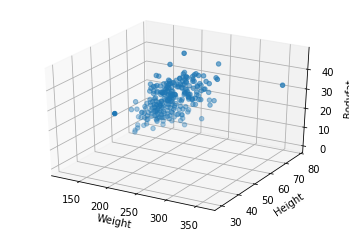

In [5]:
scatter3d = plt.figure().gca(projection='3d')
scatter3d.scatter(body_fat['Weight'], body_fat['Height'], body_fat['bodyfat'])
scatter3d.set_xlabel('Weight')
scatter3d.set_ylabel('Height')
scatter3d.set_zlabel('Bodyfat')

## Scatter Plot Matrix

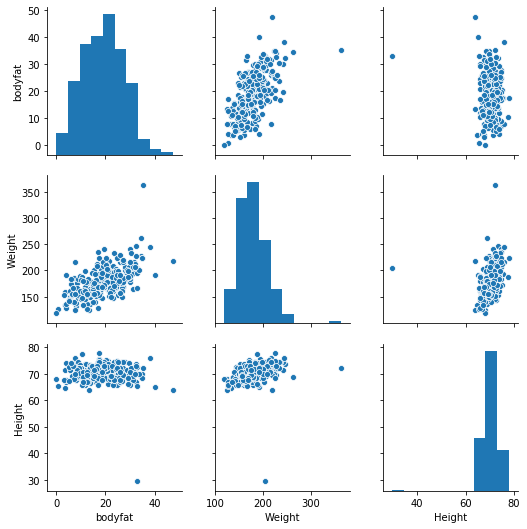

In [6]:
sns.pairplot(body_fat)

## Mean, Covariance, and Correlation Coefficient

In [7]:
body_fat.mean()

bodyfat     19.150794
Weight     178.924405
Height      70.148810
dtype: float64

In [8]:
body_fat.cov()

,bodyfat,Weight,Height
bodyfat,70.035816,150.623377,-2.743346
Weight,150.623377,863.722719,33.185647
Height,-2.743346,33.185647,13.416513


In [9]:
body_fat.corr()

,bodyfat,Weight,Height
bodyfat,1.000000,0.612414,-0.089495
Weight,0.612414,1.000000,0.308279
Height,-0.089495,0.308279,1.000000


## Principal Components Analysis on Standardized Data

Text(0.5, 0, 'PC 3')

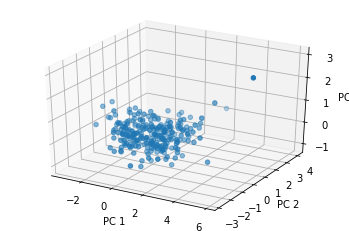

In [10]:
body_fat_no_outlier = body_fat[body_fat['Height'] > 40]
data_standardized = StandardScaler().fit_transform(body_fat_no_outlier) # standardize data
pca = PCA(n_components=3) # instantiate sklearn's PCA transformer
principal_components = pca.fit_transform(data_standardized)
body_fat_principal = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
scatter3d = plt.figure().gca(projection='3d')
scatter3d.scatter(body_fat_principal['PC1'], body_fat_principal['PC2'], body_fat_principal['PC3'])
scatter3d.set_xlabel('PC 1')
scatter3d.set_ylabel('PC 2')
scatter3d.set_zlabel('PC 3')

In [11]:
body_fat_principal.cov()

,PC1,PC2,PC3
PC1,1.778151e+00,4.373680e-17,-9.421333e-17
PC2,4.373680e-17,1.026906e+00,8.524591e-17
PC3,-9.421333e-17,8.524591e-17,2.069435e-01


## Projection of Data to 2 Dimensions

Text(0.5, 0, 'PC 3')

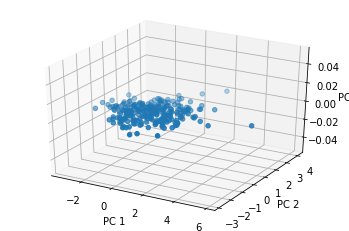

In [12]:
body_fat_projected = body_fat_principal
body_fat_projected['PC3'] = 0 # zero out PC 3
scatter3d = plt.figure().gca(projection='3d')
scatter3d.scatter(body_fat_projected['PC1'], body_fat_projected['PC2'], body_fat_projected['PC3'])
scatter3d.set_xlabel('PC 1')
scatter3d.set_ylabel('PC 2')
scatter3d.set_zlabel('PC 3')